In [1]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [83]:
import numpy as np
from numpy.linalg import inv, eig
from scipy.differentiate import jacobian
# from scipy.optimize import fsolve

import matplotlib.pyplot as plt
import seaborn as sns

import time

## Kiyotaki and Moore (1997)

Our baseline model of credit cycles to implement is Kiyotaki and Moore (1997)'s model. I found helpful to refer to the Matlab code by Ryo Kato.

In [19]:
# Set parameters
# Each period is a length of a quarter of an year.
a = 1
ϕ = 20    
R = 1.01  # gross interest rate; equals the gatherer's constant rate of time preference β'.
λ = 0.975
π = 0.1
ν = 2     # Note that it is not v, but the greek letter nu.

In [67]:
# Steady-state values

DKstar = (a + λ*ϕ - ϕ)/(R-1)
qstar = (R/(R-1))*(π*a - (1-λ)*(1 - R + π*R)*ϕ)/(λ*π + (1-λ)*(1 - R + π*R))
xstar = qstar * (R-1)/R
Kstar = xstar + ν
Dstar = DKstar * Kstar

qKD = np.array([qstar, Kstar, Dstar])

def print_steady_state():
    print('========== Steady-State Values =========')
    print(f'[01] DKstar: {DKstar:.5f}')
    print(f'[02] qstar : {qstar:.5f}')
    print(f'[03] xstar : {xstar:.5f}')
    print(f'[04] Kstar : {Kstar:.5f}')
    print(f'[05] Dstar : {Dstar:.5f}')

In [68]:
print_steady_state()

========== Steady-State Values =========
[01] DKstar: 50.00000
[02] qstar : 55.16913
[03] xstar : 0.54623
[04] Kstar : 2.54623
[05] Dstar : 127.31145


In [69]:
capital = lambda qt, Dt, Kt, qa, Da, Ka: (π/(qt + ϕ - qa/R))*((a+λ+ϕ+qt)*Kt - R*Dt) + (1-π)*λ*Kt - Ka
debt = lambda qt, Dt, Kt, qa, Da, Ka: R*Dt + qt*(Ka - Kt) + ϕ*(Ka - λ*Kt) - a*Kt - Da
euler = lambda qt, Dt, Kt, qa, Da, Ka: qt -qa/R - (Kt - ν)

def optc(x):
    qt, Dt, Kt, qa, Da, Ka = x
    return [capital(qt, Dt, Kt, qa, Da, Ka), debt(qt, Dt, Kt, qa, Da, Ka), euler(qt, Dt, Kt, qa, Da, Ka)]

jacobian_optc = lambda qt, Dt, Kt, qa, Da, Ka: jacobian(optc, (qt, Dt, Kt, qa, Da, Ka)).df

In [80]:
# Linearization

# (1) Define linear coefficients.
coef = jacobian_optc(qstar, Dstar, Kstar, qstar, Dstar, Kstar)

# (2) In terms of % deviations from the steady-state.
vo = np.array([qstar, Dstar, Kstar])
TW = np.block([[vo], [vo], [vo]])

C = -coef[:, :3] * TW
B = coef[:, 3:] * TW
A = inv(C)@B

In [112]:
# Solution Procedures

# Eigendecomposition
θ, W = eig(A)
Q = inv(W)

# Extract stable vectors.
SQ = np.zeros((len(θ), len(θ)))
jw = 0

for j in range(len(θ)):
    if np.abs(θ[j]) > 1.000000001:
        SQ[jw, :] = Q[j, :]
        jw += 1

# Extract unstable vectors.
UQ = np.zeros()

C:\Users\seho6\AppData\Local\Temp\ipykernel_8332\3727490356.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  SQ[jw, :] = Q[j, :]


In [ ]:
# Simulation Program

# (1) Time and initial values
T = 80 # time span you want to simulate

S1 = np.array([0, 0.01]) # initial state variable + e
sig = 0                  # stop stochastic simulation if sig=0
e = np.zeros((T, k))

# (2) Simulation
Ss = S1
S = np.zeros((T, k))
for i in range(T):
    q = AA @ Ss
    S[i, :] = q.T
    Ss = S[i, :].T
SY = np.block([[S1.T], [S]])
X = (P@SY.T).T

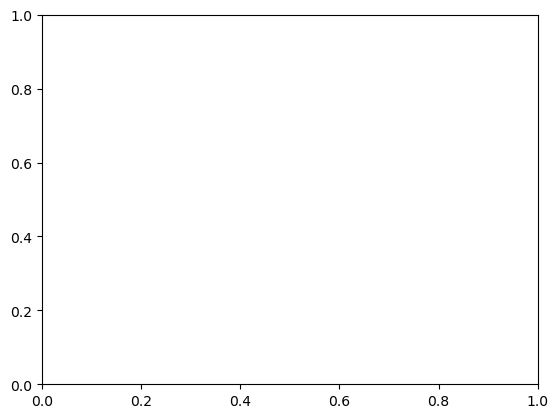

In [102]:
# Draw figures.

fig, ax = plt.subplots()

plt.show()

In [111]:
np.append(SQ, [[3]], axis=1)

array([[3.]])